In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

C:\Users\Rachel\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [5]:
#show the total number of nulls for each feature
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
def impute_median(series):
    return series.fillna(series.median())

In [7]:
#Fill children column with the median of the children
df.children = df['children'].transform(impute_median)

In [8]:
# Remove rows with NaN in the 'country' column from the original DataFrame
df.dropna(subset=['country'], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [9]:
df.isnull().sum()

# replace agent and company with have and dont have

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16006
company         

In [10]:
df['agent_encoded'] = df['agent'].isnull().astype(int)

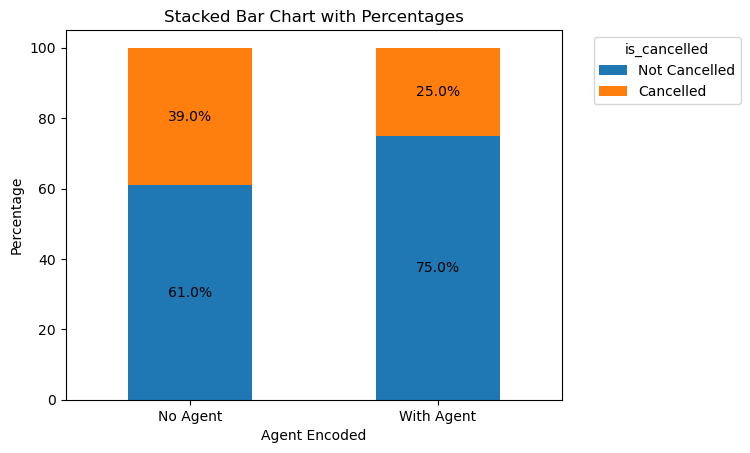

In [11]:
grouped = df.groupby(['agent_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Agent', 'With Agent']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Agent Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [12]:
df['company_encoded'] = df['company'].isnull().astype(int)

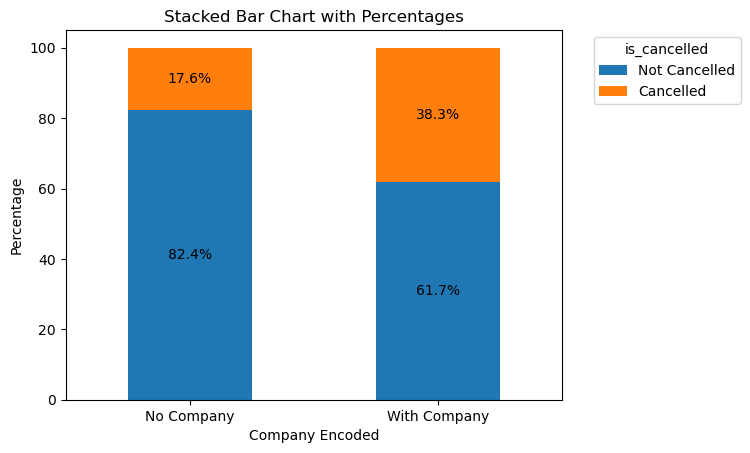

In [13]:
grouped = df.groupby(['company_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Company', 'With Company']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Company Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [14]:
df.skew()

C:\Users\Rachel\AppData\Local\Temp\ipykernel_9840\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


is_canceled                        0.532434
lead_time                          1.344451
arrival_date_year                 -0.234314
arrival_date_week_number          -0.009956
arrival_date_day_of_month         -0.002477
stays_in_weekend_nights            1.298351
stays_in_week_nights               2.697650
adults                            18.458501
children                           4.105649
babies                            24.701893
is_repeated_guest                  5.317373
previous_cancellations            24.425685
previous_bookings_not_canceled    24.037152
booking_changes                    6.005437
agent                              1.092215
company                            0.599575
days_in_waiting_list              11.919584
adr                               10.598351
required_car_parking_spaces        4.195646
total_of_special_requests          1.346640
agent_encoded                      2.141089
company_encoded                   -3.874565
dtype: float64

In [15]:
# Count the frequency of each unique value in the "babies" column
babies_counts = df["babies"].value_counts()
babies_counts

0     117988
1        898
2         14
10         1
9          1
Name: babies, dtype: int64

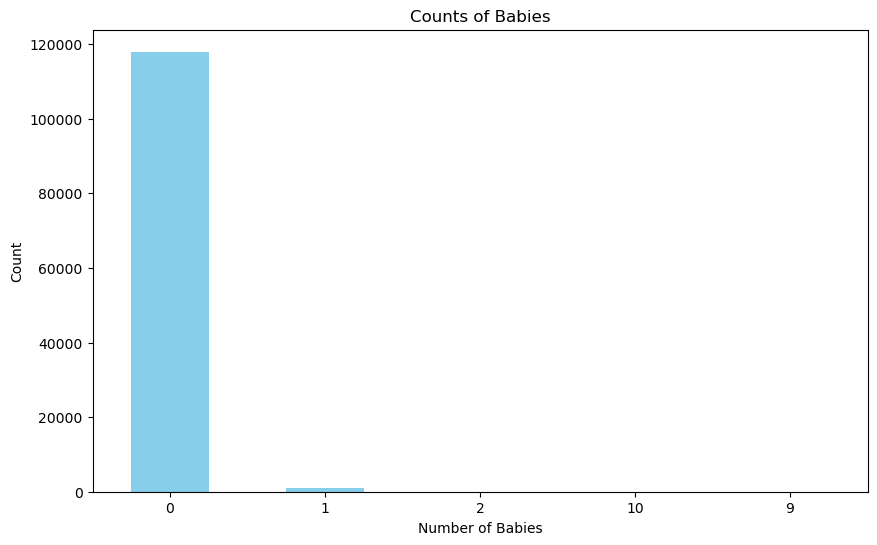

In [16]:
plt.figure(figsize=(10, 6))
babies_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Babies')
plt.ylabel('Count')
plt.title('Counts of Babies')
plt.xticks(rotation=0)
plt.show()

In [17]:
# Count the frequency of each unique value in the "adults" column
adult_counts = df["adults"].value_counts()
adult_counts

2     89498
1     22735
3      6198
0       393
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

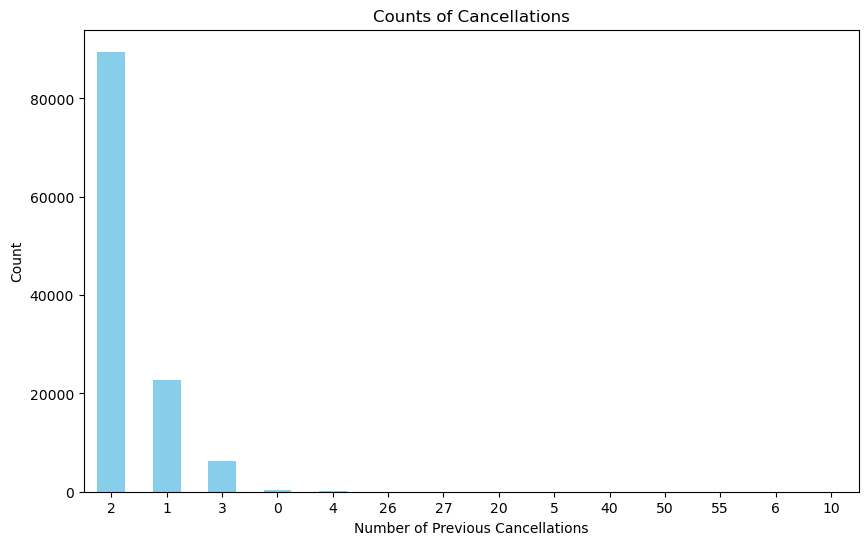

In [18]:
plt.figure(figsize=(10, 6))
adult_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Count')
plt.title('Counts of Cancellations')
plt.xticks(rotation=0)
plt.show()

In [19]:
correlation_matrix = df.corr()
#correlation between is_canceled against other numeric attributes
is_cancelled_correlation = correlation_matrix['is_canceled']
sorted_correlations = is_cancelled_correlation.sort_values(ascending=False, key=abs)
sorted_correlations

is_canceled                       1.000000
lead_time                         0.291940
total_of_special_requests        -0.235595
required_car_parking_spaces      -0.194801
booking_changes                  -0.144669
previous_cancellations            0.109914
agent_encoded                    -0.099457
company_encoded                   0.098028
is_repeated_guest                -0.085185
agent                            -0.081954
adults                            0.058408
previous_bookings_not_canceled   -0.055495
days_in_waiting_list              0.054008
adr                               0.046133
babies                           -0.032523
company                          -0.024385
stays_in_week_nights              0.024103
arrival_date_year                 0.016339
arrival_date_week_number          0.007481
arrival_date_day_of_month        -0.006173
children                          0.004740
stays_in_weekend_nights          -0.002639
Name: is_canceled, dtype: float64

In [20]:
from scipy.stats import chi2_contingency

# List of features (other than 'deposit_type') to test
feature_list = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type', 'reservation_status','company_encoded','agent_encoded']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared Statistic', 'P-value'])

# Loop through the list of features and perform chi-squared tests
for feature in feature_list:
    contingency_table = pd.crosstab(df['is_canceled'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)

# Display the results as a table (ascending)
print(results_df)

C:\Users\Rachel\AppData\Local\Temp\ipykernel_9840\1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\Rachel\AppData\Local\Temp\ipykernel_9840\1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\Rachel\AppData\Local\Temp\ipykernel_9840\1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\Rachel\AppData\Local\Temp\ipyke

                      Feature  Chi-Squared Statistic        P-value
0           arrival_date_year              76.864320   2.037629e-17
1          arrival_date_month             562.212171  1.679657e-113
2   arrival_date_day_of_month             321.887339   1.245444e-50
3    arrival_date_week_number            1096.605323  1.514505e-195
4                        meal             304.270625   1.298819e-64
5                     country           15434.681533   0.000000e+00
6              market_segment            8394.485010   0.000000e+00
7        distribution_channel            3653.712427   0.000000e+00
8          reserved_room_type             637.147604  2.215793e-131
9          assigned_room_type            4841.145584   0.000000e+00
10              customer_type            2254.871846   0.000000e+00
11               deposit_type           27548.334078   0.000000e+00
12         reservation_status          118902.000000   0.000000e+00
13            company_encoded            1141.70

C:\Users\Rachel\AppData\Local\Temp\ipykernel_9840\1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\Rachel\AppData\Local\Temp\ipykernel_9840\1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
C:\Users\Rachel\AppData\Local\Temp\ipykernel_9840\1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)


In [21]:
df['arrival_date'] = df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

In [22]:
df['arrival_date_w_year'] = df['arrival_date'].astype(str) + '-' + df['arrival_date_year'].astype(str)

In [23]:
df['arrival_date_w_year'] = pd.to_datetime(df['arrival_date_w_year'], format='%B-%d-%Y')

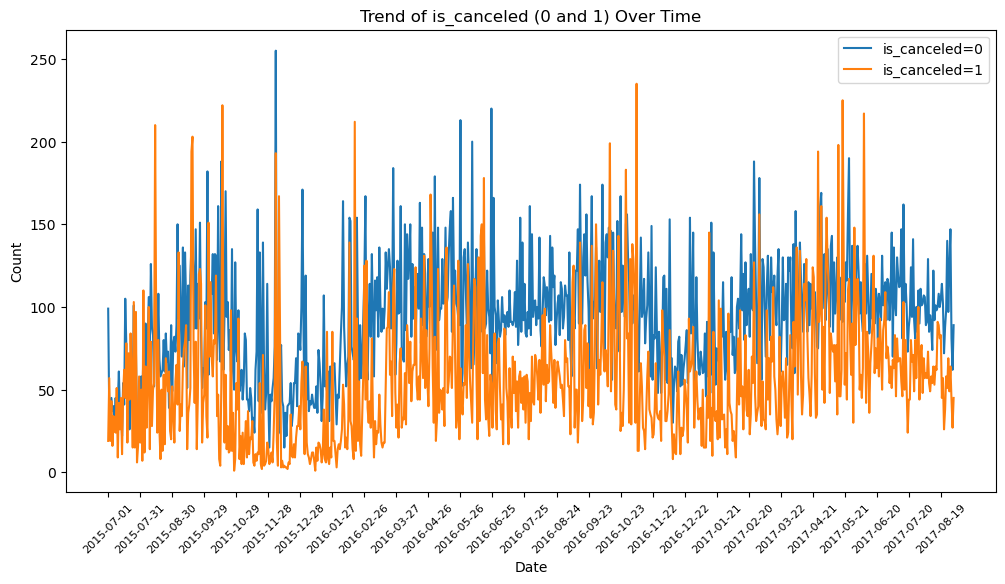

In [24]:
date_cancel_counts = df.groupby(['arrival_date_w_year', 'is_canceled']).size().unstack(fill_value=0)

# Create a new column that calculates the total counts for each date
date_cancel_counts['total'] = date_cancel_counts.sum(axis=1)

# Plot the trendlines
plt.figure(figsize=(12, 6))
plt.plot(date_cancel_counts.index, date_cancel_counts[0], label='is_canceled=0', linestyle='-')
plt.plot(date_cancel_counts.index, date_cancel_counts[1], label='is_canceled=1', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trend of is_canceled (0 and 1) Over Time')

# Show only year/month as x-axis labels for readability
plt.xticks(date_cancel_counts.index[::30], rotation=45, fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()

#From this graph, we can observe a trend and see that generally, the number of cancelled booking is lower than the number of non-cancelled booking.
#However, we can also observe that for certain period of time, there is a sharp increase in cancelled booking, which makes the number of cancelled booking higher than the number of non-cancelled booking.

In [25]:
dates_with_condition = []

# Iterate through the rows of date_cancel_counts
for index, row in date_cancel_counts.iterrows():
    # Check if the count for is_canceled=1 is higher than the count for is_canceled=0
    if row[1] > row[0]:
        dates_with_condition.append(index)

formatted_dates = [date.strftime('%Y-%m-%d') for date in dates_with_condition]

# Print the formatted dates
print("Dates where is_canceled=1 count is higher than is_canceled=0 count:")
print(formatted_dates)

Dates where is_canceled=1 count is higher than is_canceled=0 count:
['2015-07-02', '2015-07-09', '2015-07-13', '2015-07-16', '2015-07-18', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-25', '2015-07-27', '2015-07-30', '2015-08-03', '2015-08-13', '2015-08-14', '2015-08-27', '2015-08-30', '2015-09-05', '2015-09-10', '2015-09-17', '2015-09-18', '2015-09-24', '2015-09-26', '2015-10-03', '2015-10-05', '2015-10-16', '2015-10-17', '2015-10-24', '2015-11-13', '2015-12-08', '2015-12-09', '2016-01-22', '2016-01-27', '2016-02-17', '2016-02-21', '2016-02-26', '2016-02-28', '2016-03-25', '2016-04-14', '2016-04-19', '2016-04-24', '2016-04-28', '2016-05-13', '2016-05-24', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-12', '2016-06-14', '2016-06-15', '2016-06-17', '2016-07-07', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-24', '2016-09-30', '2016-10-01', '2016-10-13', '2016-10-15', '2016-10-21', '2016-10-22', '2016-10-27', '2016-10-28', '2016-11-01', '2016-11-03', '2016-11-04', '2016-1

## we consider those at p-value == 0
## top 7 are reservation status, country, deposit type, market segment, assigned_room_type, distribution_channel, customer type but we omit reservation status

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118902 non-null  object        
 1   is_canceled                     118902 non-null  int64         
 2   lead_time                       118902 non-null  int64         
 3   arrival_date_year               118902 non-null  int64         
 4   arrival_date_month              118902 non-null  object        
 5   arrival_date_week_number        118902 non-null  int64         
 6   arrival_date_day_of_month       118902 non-null  int64         
 7   stays_in_weekend_nights         118902 non-null  int64         
 8   stays_in_week_nights            118902 non-null  int64         
 9   adults                          118902 non-null  int64         
 10  children                        118902 non-null  float64

In [27]:
# Define the columns you want to select
columns_to_select = ['lead_time', 'country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type', 'agent_encoded', 'company_encoded', 'arrival_date_week_number']

# Create the new DataFrame by selecting the desired columns
final_df = df[columns_to_select]


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   lead_time                 118902 non-null  int64 
 1   country                   118902 non-null  object
 2   deposit_type              118902 non-null  object
 3   market_segment            118902 non-null  object
 4   assigned_room_type        118902 non-null  object
 5   distribution_channel      118902 non-null  object
 6   customer_type             118902 non-null  object
 7   agent_encoded             118902 non-null  int32 
 8   company_encoded           118902 non-null  int32 
 9   arrival_date_week_number  118902 non-null  int64 
dtypes: int32(2), int64(2), object(6)
memory usage: 8.2+ MB


In [29]:
final_df

lead_time country deposit_type market_segment assigned_room_type  \
0             342     PRT   No Deposit         Direct                  C   
1             737     PRT   No Deposit         Direct                  C   
2               7     GBR   No Deposit         Direct                  C   
3              13     GBR   No Deposit      Corporate                  A   
4              14     GBR   No Deposit      Online TA                  A   
...           ...     ...          ...            ...                ...   
118897         23     BEL   No Deposit  Offline TA/TO                  A   
118898        102     FRA   No Deposit      Online TA                  E   
118899         34     DEU   No Deposit      Online TA                  D   
118900        109     GBR   No Deposit      Online TA                  A   
118901        205     DEU   No Deposit      Online TA                  A   

       distribution_channel customer_type  agent_encoded  company_encoded  \
0                    Direct     Transient              1                1   
1                    Direct     Transient              1                1   
2                    Direct     Transient              1                1   
3                 Corporate     Transient              0                1   
4                     TA/TO     Transient              0                1   
...                     ...           ...            ...              ...   
118897                TA/TO     Transient              0                1   
118898                TA/TO     Transient              0                1   
118899                TA/TO     Transient              0                1   
118900                TA/TO     Transient              0                1   
118901                TA/TO     Transient              0                1   

        arrival_date_week_number  
0                             27  
1                             27  
2                             27  
3                             27  
4                             27  
...                          ...  
118897                        35  
118898                        35  
118899                        35  
118900                        35  
118901                        35  

[118902 rows x 10 columns]

In [30]:
from sklearn.preprocessing import OneHotEncoder
# Perform one-hot encoding
transformed_df = final_df[['lead_time', 'agent_encoded', 'company_encoded']].copy()
transformed_df['arrival_date_week_number'] = df['arrival_date_week_number']
attributes_to_encode = ['country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type']
for attribute in attributes_to_encode:
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(final_df[[attribute]])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([attribute]))

    # Concatenate the one-hot encoded features with the original dataframe
    transformed_df = pd.concat([transformed_df, onehot_encoded_df], axis=1)
    print(transformed_df.shape)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_df[['lead_time', 'arrival_date_week_number']])
transformed_df[['lead_time', 'arrival_date_week_number']] = scaled_data

(118902, 181)
(118902, 184)
(118902, 192)
(118902, 204)
(118902, 209)
(118902, 213)


# **Split data into Train-Test Sets**

In [32]:
X = transformed_df
y = df['is_canceled']
print(X.shape, y.shape)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(118902, 213) (118902,)


# **Models**

# **1. Logistic Regression**

a. Build Logistic Regression Model

In [36]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

b. Make Predictions on Test set



In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)

c. Evaluate the Model

In [ ]:
# or
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7700685421134519
Precision: 0.7760358342665173
Recall: 0.5438950554994955
F1 Score: 0.6395517468688201


i. Retrieving the coefficients and intercept for interpretability

In [40]:
# Get the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f"    {X.columns[i]}: {coef}")

print(f"Intercept: {intercept}")

Coefficients:
    lead_time: 0.6281015287455269
    agent_encoded: -0.38991001090857685
    company_encoded: 0.9640186307447549
    arrival_date_week_number: -0.025861632011233125
    country_ABW: -0.19551895827351673
    country_AGO: 1.7971850530118216
    country_AIA: -0.06059538823678419
    country_ALB: -0.150610845987359
    country_AND: 0.6106610260414134
    country_ARE: 2.362677545376839
    country_ARG: -0.4297307000143088
    country_ARM: 0.01491924202768441
    country_ASM: 0.0
    country_ATA: -0.10150393724736105
    country_ATF: -0.11313938483562008
    country_AUS: -0.6856829200876295
    country_AUT: -0.8698619457296074
    country_AZE: 0.5129722511320193
    country_BDI: -0.01477670140716799
    country_BEL: -0.8308071928542888
    country_BEN: 0.26628749108644045
    country_BFA: -0.07930288937401267
    country_BGD: 0.7882547211955481
    country_BGR: -1.211826257114933
    country_BHR: 0.2896253337129948
    country_BHS: -0.024880133167982002
    country_BIH: 0.0360

ii. Performed preliminary regularization on the model to see if it performs better, but it did not.

In [41]:
# Initialize the logistic regression model with L2 regularization (Ridge)
# You can adjust the value of C to control the strength of regularization
model_regularized = LogisticRegression(penalty='l2', C=0.8)

# Train the regularized model
model_regularized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_regularized = model_regularized.predict(X_test)

# Evaluate the regularized model
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
conf_matrix_regularized = confusion_matrix(y_test, y_pred_regularized)
classification_rep_regularized = classification_report(y_test, y_pred_regularized)

print("Regularized Logistic Regression:")
print(f"Accuracy: {accuracy_regularized}")
print(f"Confusion Matrix:\n{conf_matrix_regularized}")
print(f"Classification Report:\n{classification_rep_regularized}")

# Get the coefficients and intercept of the regularized model
coefficients_regularized = model_regularized.coef_[0]
intercept_regularized = model_regularized.intercept_[0]

print("Coefficients (Regularized Model):")
for i, coef in enumerate(coefficients_regularized):
    print(f"    {X.columns[i]}: {coef}")

print(f"Intercept (Regularized Model): {intercept_regularized}")

Regularized Logistic Regression:
Accuracy: 0.7697741894789958
Confusion Matrix:
[[13457  1405]
 [ 4070  4849]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     14862
           1       0.78      0.54      0.64      8919

    accuracy                           0.77     23781
   macro avg       0.77      0.72      0.74     23781
weighted avg       0.77      0.77      0.76     23781

Coefficients (Regularized Model):
    lead_time: 0.6290614086362581
    agent_encoded: -0.3872248267569282
    company_encoded: 0.9645824724198112
    arrival_date_week_number: -0.02533732191409848
    country_ABW: -0.19611393753861825
    country_AGO: 1.6858505506370367
    country_AIA: -0.060731318224478505
    country_ALB: -0.15103128197891968
    country_AND: 0.6142210178203046
    country_ARE: 2.3893886393407175
    country_ARG: -0.4554470779738355
    country_ARM: 0.015400513413009088
    country_ASM: 0.0
    country_ATA: -0.10

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


iii. **Hyperparameter Tuning**
to find the regularization that will yield the best results, then evaluating the new model post hyperparameters tuning. In this case, it did perform better.

In [42]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Initialize the logistic regression model
logreg = LogisticRegression()

# Define a distribution of values for the 'C' parameter (regularization strength)
param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=20, cv=10, scoring='precision', random_state=0)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
precision_best = precision_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print("Best Logistic Regression Model based on Precision:")
print(f"Precision: {precision_best}")
print(f"Confusion Matrix:\n{conf_matrix_best}")
print(f"Classification Report:\n{classification_rep_best}")

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 7 is smaller than n_iter=20. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best Hyperparameters: {'C': 0.001}
Best Logistic Regression Model based on Precision:
Precision: 0.8111375709836967
Confusion Matrix:
[[13831  1031]
 [ 4491  4428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     14862
           1       0.81      0.50      0.62      8919

    accuracy                           0.77     23781
   macro avg       0.78      0.71      0.72     23781
weighted avg       0.78      0.77      0.75     23781



# **2. Decision Tree**

**Before Hyperparameter Tuning**

a. Building Decision Tree Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

b. Make Predictions on Test set

In [ ]:
y_pred = clf.predict(X_test)

c. Evaluating the model

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision Score:", precision)
print("Recall Score:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Precision Score: 0.7574046329376513
Recall Score: 0.7368539073887207
Accuracy: 0.8127917244859342
F1 Score: 0.7469879518072289


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     14862
           1       0.76      0.74      0.75      8919

    accuracy                           0.81     23781
   macro avg       0.80      0.80      0.80     23781
weighted avg       0.81      0.81      0.81     23781



c. Visualising the Decision Trees

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0396583 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0396583 to fit



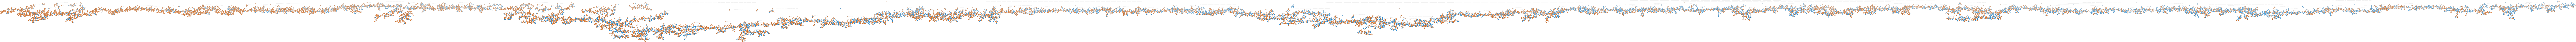

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image

feature_cols = transformed_df.columns
class_names = ['Not Cancelled', 'Cancelled']

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                    feature_names = feature_cols,
                    filled = True, rounded = True,
                    special_characters = True,
                    class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bookingTree.png')
Image(graph.create_png())


**Carrying Out RandomizedSearchCV Hyperparameter Tuning**

a. Performing Random Search

In [ ]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_impurity_decrease': uniform(0, 0.5),
    'class_weight': [None, 'balanced'],
    'ccp_alpha': uniform(0, 0.5)
}

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=20, cv=10, random_state=0, scoring="precision")
random_search.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c7d984f9e10>,
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7d984fbf10>,
                                        'max_features':...
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c7d984fa890>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7d984fab60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c7e68b9e020>,
                                        'splitter': ['best', 'random']},
                   random_state=0, scoring='precision')

b. Evaluating the model

In [ ]:
print("Best parameters found: ", random_search.best_params_)
print("Best estimators found: ", random_search.best_estimator_)
print("Best score found: ", random_search.best_score_)

Best parameters found:  {'ccp_alpha': 0.179753950286893, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'min_impurity_decrease': 0.030112735814634917, 'min_samples_leaf': 4, 'min_samples_split': 8, 'splitter': 'random'}
Best estimators found:  DecisionTreeClassifier(ccp_alpha=0.179753950286893, criterion='entropy',
                       max_depth=2, min_impurity_decrease=0.030112735814634917,
                       min_samples_leaf=4, min_samples_split=8,
                       splitter='random')
Best score found:  0.8895356766577246


**After Hyperparameter Tuning**

a. Building Decision Tree Model with Best Parameters Found

In [ ]:
clf_tuned = DecisionTreeClassifier(ccp_alpha=0.179753950286893, criterion='entropy',
                       max_depth=2, min_impurity_decrease=0.030112735814634917,
                       min_samples_leaf=4, min_samples_split=8,
                       splitter='random')
clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)

b. Evaluating the model

In [ ]:
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
accuracy = accuracy_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)

print("Precision Score:", precision)
print("Recall Score:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Precision Score: 0.9914908100748808
Recall Score: 0.32660612176252946
Accuracy: 0.746394180227913
F1 Score: 0.49135531753394623


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14862
           1       0.99      0.33      0.49      8919

    accuracy                           0.75     23781
   macro avg       0.85      0.66      0.66     23781
weighted avg       0.82      0.75      0.70     23781



b. Visualising the Decision Trees

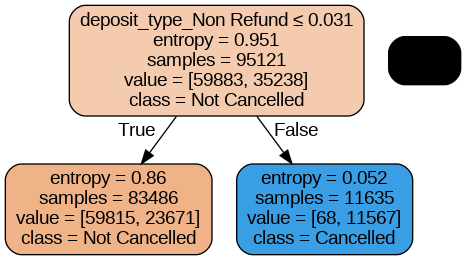

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image

feature_cols = transformed_df.columns
class_names = ['Not Cancelled', 'Cancelled']

dot_data = StringIO()
export_graphviz(clf_tuned, out_file = dot_data,
                    feature_names = feature_cols,
                    filled = True, rounded = True,
                    special_characters = True,
                    class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bookingTree.png')
Image(graph.create_png())

# **3. Random Forest**

a. Building Random Forest Model

In [43]:
#Building Random Forest with Default Parameters

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(oob_score=True)
rd_clf.fit(X_train, y_train)
y_pred_rd_clf = rd_clf.predict(X_test)

#Model Evaluation
print(f"Random Forest OOB Score is : {rd_clf.oob_score_}")

prec_rd_clf = precision_score(y_test, y_pred_rd_clf)
print(f"Precision Score of Random Forest is : {prec_rd_clf}")

clf_report = classification_report(y_test, y_pred_rd_clf)
print(f"Classification Report : \n{clf_report}")

conf = confusion_matrix(y_test, y_pred_rd_clf)
print(f"Confusion Matrix : \n{conf}")

Random Forest OOB Score is : 0.8282503337853891
Precision Score of Random Forest is : 0.7835642618251314
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     14862
           1       0.78      0.74      0.76      8919

    accuracy                           0.82     23781
   macro avg       0.82      0.81      0.81     23781
weighted avg       0.82      0.82      0.82     23781

Confusion Matrix : 
[[13050  1812]
 [ 2359  6560]]


b. Performing Hyperparameter Tuning

In [44]:
# Hyperparameter Tuning -> Finding best parameters

from sklearn.model_selection import RandomizedSearchCV

param_random = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3,6,9],
    'max_leaf_nodes': [3,6,9]
    }

randomized_search = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=param_random, n_iter=20, cv=10, random_state=0, scoring="precision")
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", randomized_search.best_params_)

# Finding Best Estimators and Best Scores

print("Best estimators found: ", randomized_search.best_estimator_)
print("Best score found: ", randomized_search.best_score_)

C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rachel\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Rachel\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Rachel\anaconda3\lib\site-packa

Best Hyperparameters: {'n_estimators': 100, 'max_leaf_nodes': 3, 'max_depth': 6, 'criterion': 'gini'}
Best estimators found:  RandomForestClassifier(max_depth=6, max_leaf_nodes=3)
Best score found:  0.9980662450313647


c. Testing and Evaluating model with best parameters

In [45]:
#Testing RF with Tuned Hyperparameters

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(oob_score=True, max_depth=3, max_leaf_nodes=3, n_estimators=150)
rd_clf.fit(X_train, y_train)
y_pred_rd_clf = rd_clf.predict(X_test)

#Model Evaluation
print(f"Random Forest OOB Score is : {rd_clf.oob_score_}")

prec_rd_clf = precision_score(y_test, y_pred_rd_clf)
print(f"Precision Score of Random Forest is : {prec_rd_clf}")

clf_report = classification_report(y_test, y_pred_rd_clf)
print(f"Classification Report : \n{clf_report}")

conf = confusion_matrix(y_test, y_pred_rd_clf)
print(f"Confusion Matrix : \n{conf}")

Random Forest OOB Score is : 0.7487305642287192
Precision Score of Random Forest is : 0.9931530297843204
Classification Report : 
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14862
           1       0.99      0.33      0.49      8919

    accuracy                           0.75     23781
   macro avg       0.85      0.66      0.66     23781
weighted avg       0.82      0.75      0.70     23781

Confusion Matrix : 
[[14842    20]
 [ 6018  2901]]


# **4. XGBoost (Extreme Gradient Boosting)**

a. Build the XGBoost Model

In [52]:
# Base Model without hyperparameter tuning
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

clf_report = classification_report(y_test, y_pred)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the performance metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f"Classification Report : \n{clf_report}")

Accuracy: 0.8132963290021445
Precision: 0.817524457677584
Recall: 0.646485031954255
F1 Score: 0.7220135236664162
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     14862
           1       0.82      0.65      0.72      8919

    accuracy                           0.81     23781
   macro avg       0.81      0.78      0.79     23781
weighted avg       0.81      0.81      0.81     23781



b. Perform Hyperparameter Tuning, Train & Test the model. Over here, we aim to tune the crucial hyperparameters that will have the most impact on the model.

In [53]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy import stats

xgb_model = xgb.XGBClassifier()

params = {
            'objective':['binary:logistic'],
            'max_depth': stats.randint(3, 10),
            'learning_rate': stats.uniform(0.01,0.5),
            'subsample': stats.uniform(0.01,0.8),
            'n_estimators': stats.randint(100,500)
         }  


random_search=RandomizedSearchCV(xgb_model,param_distributions=params,
                            n_iter=40,scoring='precision',cv=10,
                            random_state=0)

random_search.fit(X, y)

print("Best parameters found: ")
print(random_search.best_params_)
print("---------------------------")

best_model = random_search.best_estimator_

y_pred_best = best_model.predict(X_test)

Best parameters found: 
{'learning_rate': 0.22664403099102204, 'max_depth': 3, 'n_estimators': 119, 'objective': 'binary:logistic', 'subsample': 0.32687862033868986}
---------------------------


c. Evaluating the model.

In [55]:
# Calculate performance metrics
precision = precision_score(y_test, y_pred_best)
clf_report = classification_report(y_test, y_pred)

# Print the performance metrics
print(f'Precision: {precision}')
print(f"Classification Report : \n{clf_report}")

Precision: 0.8104767510300177
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86     14862
           1       0.82      0.65      0.72      8919

    accuracy                           0.81     23781
   macro avg       0.81      0.78      0.79     23781
weighted avg       0.81      0.81      0.81     23781



# **5. Feedforward Neural Network**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report

In [34]:
# Define the feature columns (x) and the target column (y)
X = df[['lead_time', 'country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type', 'company_encoded', 'agent_encoded', 'arrival_date_week_number']]
y = df['is_canceled']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type','country'])

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize continuous features (e.g., lead_time)
scaler = StandardScaler()
X_train[['lead_time', 'arrival_date_week_number']] = scaler.fit_transform(X_train[['lead_time', 'arrival_date_week_number']])
X_test[['lead_time', 'arrival_date_week_number']] = scaler.transform(X_test[['lead_time', 'arrival_date_week_number']])

# Create the FNN model
model = keras.Sequential()
model.add(keras.layers.Input(shape=(X_train.shape[1],)))  # Input layer
model.add(keras.layers.Dense(64, activation='relu'))  # Hidden layer
model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate the accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}, Test Precision: {precision}, Test Recall: {recall}")
print(classification_report(y_test, y_pred))



Epoch 1/10


2973/2973 [==============================] - 3s 818us/step - loss: 0.4255 - accuracy: 0.7839 - precision: 0.7937 - recall: 0.5622
Epoch 2/10
2973/2973 [==============================] - 2s 821us/step - loss: 0.4028 - accuracy: 0.7925 - precision: 0.7884 - recall: 0.6003
Epoch 3/10
2973/2973 [==============================] - 2s 829us/step - loss: 0.3975 - accuracy: 0.7954 - precision: 0.7874 - recall: 0.6123
Epoch 4/10
2973/2973 [==============================] - 2s 831us/step - loss: 0.3938 - accuracy: 0.7978 - precision: 0.7901 - recall: 0.6174
Epoch 5/10
2973/2973 [==============================] - 3s 844us/step - loss: 0.3912 - accuracy: 0.7984 - precision: 0.7880 - recall: 0.6226
Epoch 6/10
2973/2973 [==============================] - 2s 821us/step - loss: 0.3883 - accuracy: 0.7998 - precision: 0.7886 - recall: 0.6268
Epoch 7/10
2973/2973 [==============================] - 2s 821us/step - loss: 0.3865 - accuracy: 0.8008 - precision: 0.7903 - recall: 0.6282
Epoch 8/1

## Hyperparameter Tuning for FNN

1. Create a custom HyperModel for Keras Tuner. This custom HyperModel will be used to define and tune the hyperparameters of the FNN.
2. Initialize the input shape and the number of classes for your FNN.
3. Tuning (hyperparameters to be tuned): 
   - The number of units (neurons) in the first hidden layer to be tuned, ranging from 32 to 512 with a step of 32. The ReLU activation function is used.
   - The number of additional hidden layers to be tuned by using a loop. Each hidden layer can have a different number of units, and the number of hidden layers can vary from 0 to 3.
   - The learning rate for the optimizer to be tuned, allowing choices of 1e-2, 1e-3, or 1e-4.

In [47]:
# kerastuner helps you pick the optimal set of hyperparameters for your TensorFlow program.
from keras_tuner import HyperModel, HyperParameters

class FNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(keras.layers.Input(shape=self.input_shape))

        # Tune the number of units in the first hidden layer
        hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(units=hp_units, activation='relu'))

        hp_units_hidden_list = []
        # Tune to Add more hidden layers if needed
        for i in range(hp.Int('num_hidden_layers', min_value=0, max_value=3)):
            hp_units_hidden = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
            hp_units_hidden_list.append(hp_units_hidden)
            model.add(keras.layers.Dense(units=hp_units, activation='relu'))

        # Tune the learning rate for the optimizer
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.add(keras.layers.Dense(units=self.num_classes, activation='sigmoid'))

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy', Precision(), Recall()]
        )

        return model

1. Define an objective for the tuner. Using "val_precision" as the objective metric, and specify to maximize this metric ("direction" is set to "max").
2. This means that the tuner will search for hyperparameters that result in the highest validation precision.
3. Use RandomSearch with 20 max_trials
4. Store and save tuning data
    - Set a directory where the tuner will store its results, checkpoints, and configurations, named 'hyperparameter_tuning'.
    - Set tThe name of the tuning project, named 'hotel_cancellation'.    - Set overwrite to True which t will overwrite the results of a previous tuning run with the same project name.

In [48]:
from kerastuner.tuners import RandomSearch
from kerastuner import Objective

objective_val = Objective("val_precision", direction="max")

tuner = RandomSearch(
    FNNHyperModel(input_shape=X_train.shape[1], num_classes=1),
    objective= objective_val,
    max_trials=20,  # The number of hyperparameter combinations to try
    seed = 0,
    directory='hyperparameter_tuning',  # Directory to store results
    project_name='hotel_cancellation',  # Name of the tuning project
    overwrite = True
)

In [49]:
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Trial 20 Complete [00h 00m 38s]
val_precision: 0.8142900466918945

Best val_precision So Far: 0.8772383332252502
Total elapsed time: 00h 16m 34s


Specify best model and get the best hyperparameters

In [50]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]

In [51]:
# Print the specific hyperparameters
print("Best Hyperparameters:")
print(f"Units in First Hidden Layer: {best_hyperparameters.get('units')}")
print(f"Number of Hidden Layers: {best_hyperparameters.get('num_hidden_layers')}")
print(f"Units for each Hidden Layers: {best_hyperparameters['units_0']}")  # Access the first unit
for i in range(1, best_hyperparameters['num_hidden_layers']):
    print(f"Units for each Hidden Layers: {best_hyperparameters[f'units_{i}']}")  # Access additional units
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

best_model.evaluate(X_test, y_test)

Best Hyperparameters:
Units in First Hidden Layer: 288
Number of Hidden Layers: 3
Units for each Hidden Layers: 288
Units for each Hidden Layers: 32
Units for each Hidden Layers: 32
Learning Rate: 0.01
744/744 [==============================] - 1s 932us/step - loss: 0.4159 - accuracy: 0.7949 - precision: 0.8772 - recall: 0.5301


[0.4158925414085388,
 0.7949203252792358,
 0.8772383332252502,
 0.5301204919815063]

Final results of FNN after hyperparameter tuning

In [52]:
# Get model predictions on the test data
y_pred_best = (best_model.predict(X_test) > 0.5).astype(int)  # Convert predicted probabilities to binary predictions

# Generate a classification report
class_report = classification_report(y_test, y_pred_best)

# Print the classification report
print(class_report)

744/744 [==============================] - 1s 784us/step
              precision    recall  f1-score   support

           0       0.77      0.96      0.85     14817
           1       0.88      0.53      0.66      8964

    accuracy                           0.79     23781
   macro avg       0.82      0.74      0.76     23781
weighted avg       0.81      0.79      0.78     23781



# Ranking of ML models based on Precision Score

1. Decision Tree: 0.99
2. Feedforward Neural Network (FNN): 0.88
3. Extreme Gradient Boosting (XGBoost): 0.81
4. Logistic Regression: 0.81
5. Random Forest: 0.77